# Demonstration: Training the binary clasification model
### Import libraries

In [1]:
from pathlib import Path
import json
from CO_BC import CO_BC

### Import default configurations
model_config.json has default hyperparameters for models: 
* the number of input features
* the nubmer of hidden neurons for each layer
* the nubmer of hidden layers
* the nubmer of training epochs
* learning rate
* batch size

In [2]:
PACKAGE_PATH = Path.cwd()
with open(PACKAGE_PATH / "model_config.json", "r") as f:
    json_dict = json.load(f)
    CO_BC_config = json_dict["model"]["CO_BC"]
CO_BC_config

{'num_input_features': 0,
 'num_hidden_neurons': [128, 256, 8],
 'num_hidden_layers': 3,
 'num_epochs': 300,
 'learning_rate': 0.001,
 'size_batch': 32}

## Update the config

Input/output paths and training-specific hyperparameters should be updated before traning

* Input paths
    * "input_csv_path_pdf": the path of the input csv file of redshift probability distribution
    * "input_csv_path_photz": the path of the input csv file of photometric redshift
* Output paths
    * "output_pdf_path": the path of the output PDF extension file for saving plots and statistics
    * "output_csv_path": the path of the output csv file for saving predictions
    * "model_path": the path of the bese model to be saved

* Training-specific hyperparameters
    * CO_ratio
    * weights: written in the format of [[range...], [weights...]]
    * train_ratio: the ratio of a training set -- a value in between 0 and 1
    * evaluation_ratio: the ratio of a base evaluation set -- a value in between 0 and 1
    * evaluatoin: perform evaluation if set to True

* Misc
    * model_no: model number (not a hyperparameter) 



In [ ]:
model_name = "model_CO_BC_hsc_SPIDERz_SPIDERz"

CO_BC_config.update({
    "input_csv_path_PDF": PACKAGE_PATH / 'data/hsc_EPDF_all.csv',
    "input_csv_path_photz": PACKAGE_PATH / 'data/hsc_EPDF_all.csv',
    "output_pdf_path": PACKAGE_PATH / f'results/results_{model_name}.pdf',
    "output_csv_path": PACKAGE_PATH / f'results/results_{model_name}.csv',
    "model_path": PACKAGE_PATH / f'trained_model/CO_BC/{model_name}.pth',

    # more hyperparamters
    "CO_ratio": 0.1,
    "weights": [[1, 2], [2, 45]],
    "train_ratio": 0.99,

    "evaluation_ratio": 0.999999999,
    "evaluation": True,
    "model_no": 0,
})

print(CO_BC_config)

{'num_input_features': 0, 'num_hidden_neurons': [128, 256, 8], 'num_hidden_layers': 3, 'num_epochs': 10, 'learning_rate': 0.001, 'size_batch': 32, 'input_csv_path_PDF': WindowsPath('d:/data/유상현/data/2024-2025 Summer Research/github/PZ_CO_ID/PZ_CO_ID/data/hsc_EPDF_all.csv'), 'input_csv_path_photz': WindowsPath('d:/data/유상현/data/2024-2025 Summer Research/github/PZ_CO_ID/PZ_CO_ID/data/hsc_EPDF_all.csv'), 'model_path': WindowsPath('d:/data/유상현/data/2024-2025 Summer Research/github/PZ_CO_ID/PZ_CO_ID/trained_model/CO_BC/model_CO_BC_hsc_SPIDERz_SPIDERz.pth'), 'output_pdf_path': WindowsPath('d:/data/유상현/data/2024-2025 Summer Research/github/PZ_CO_ID/PZ_CO_ID/results/results_model_CO_BC_hsc_SPIDERz_SPIDERz.pdf'), 'output_csv_path': WindowsPath('d:/data/유상현/data/2024-2025 Summer Research/github/PZ_CO_ID/PZ_CO_ID/results/results_model_CO_BC_hsc_SPIDERz_SPIDERz.csv'), 'CO_ratio': 0.1, 'weights': [[1, 2], [2, 45]], 'evaluation': True, 'evaluation_ratio': 0.999999999, 'train_ratio': 0.99, 'model_no'

## Train a model

Result of training is printed out during the `CO_BC.save_results()` function call

"model_no" is incremented by 1 every loop of trianing, which is specified in the file names of a saved model and a result file, which can be found in `PZ_CO_ID/PZ_CO_ID/results`

d:\data\유상현\data\2024-2025 Summer Research\github\PZ_CO_ID\PZ_CO_ID\CO_BC.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['Phot z'] = photz_df['Phot z']
d:\data\유상현\data\2024-2025 Summer Research\github\PZ_CO_ID\PZ_CO_ID\CO_BC.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['CO?'] = np.zeros(len(raw_df), dtype = int)



            Length of raw data: 286401
            Length of evaluation data set: 286401
            Length of df (for training and test): 0
            286401
            Ratio: 1.0
            Any duplicates?: set()
best model
Epoch [1/10], Loss: 0.121603913605

best model
Epoch [9/10], Loss: 0.078796558082

Epoch [10/10], Loss: 0.284960299730

242265    0.011822
202955    0.077433
225612    0.007921
173253    0.743575
65088     0.262382
            ...   
263654    0.101030
16213     0.154216
231185    0.139852
259469    0.107802
266291    0.029508
Name: Predicted CO?, Length: 25727, dtype: float32 84184     0.000004
93786     0.004681
240762    0.005109
48847     0.026870
91240     0.006609
            ...   
186725    0.004541
69543     0.010324
37917     0.000836
190595    0.033285
79443     0.000023
Name: Predicted CO?, Length: 260674, dtype: float32


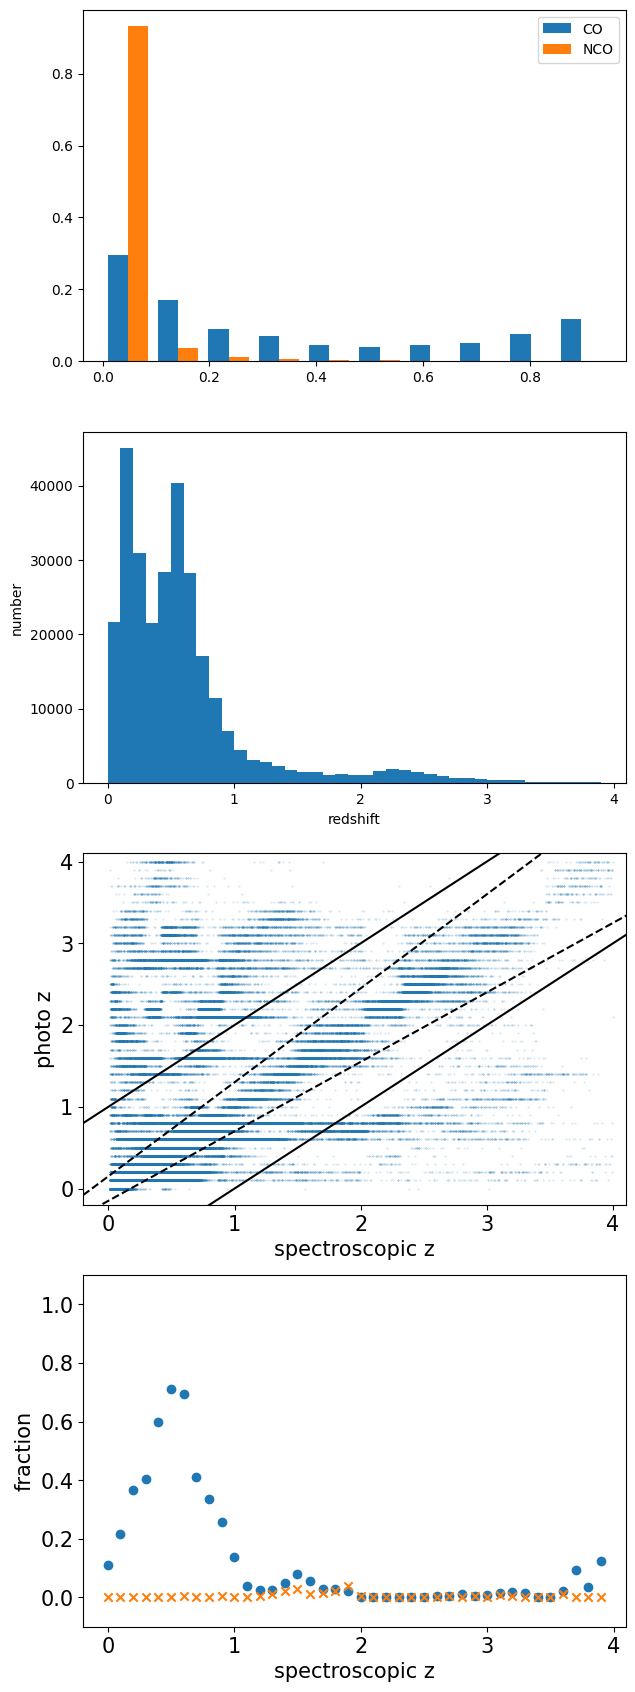

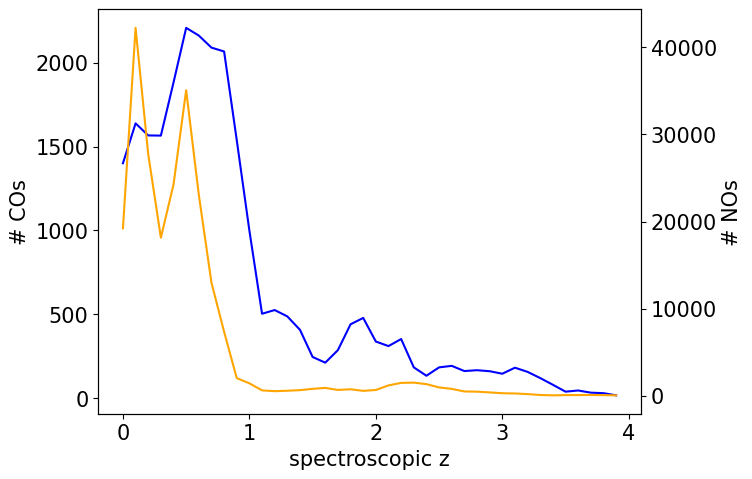

flagged nos > 2:	 0.1720%
flagged nos > 1:	 0.6761%
flagged nos:		 0.2061%
flagged COs:		 31.6982%
NOs:			 80.2836%
COs:			 8.9829%
Saved results to d:\data\유상현\data\2024-2025 Summer Research\github\PZ_CO_ID\PZ_CO_ID\results\results_model_CO_BC_hsc_SPIDERz_SPIDERz.csv


In [ ]:
CO_BC_config["num_epochs"] = 10
for i in range(1): # change the number to train models for multiple times
    CO_BC_config["model_no"] += 1

    CO_BC_model = CO_BC(**CO_BC_config)

    data = CO_BC_model.preprocess_data()
    dl = CO_BC_model.build_dl(data)
    best_model = CO_BC_model.train_model(dl)
    results = CO_BC_model.evaluate_model(data, dl)
    CO_BC_model.save_results(data, results)